In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("tic-tac-toe.csv")
data

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,False
954,o,x,o,x,x,o,x,o,x,False
955,o,x,o,x,o,x,x,o,x,False
956,o,x,o,o,x,x,x,o,x,False


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


categorical_columns = data.columns  

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


data = data.astype(float)


print("\nConverted Dataset:")
print(data.head())



Converted Dataset:
    TL   TM   TR   ML   MM   MR   BL   BM   BR  class
0  2.0  2.0  2.0  2.0  1.0  1.0  2.0  1.0  1.0    1.0
1  2.0  2.0  2.0  2.0  1.0  1.0  1.0  2.0  1.0    1.0
2  2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  2.0    1.0
3  2.0  2.0  2.0  2.0  1.0  1.0  1.0  0.0  0.0    1.0
4  2.0  2.0  2.0  2.0  1.0  1.0  0.0  1.0  0.0    1.0


In [7]:
X = data.drop(columns=['TL', 'class'])

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

In [12]:
data_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

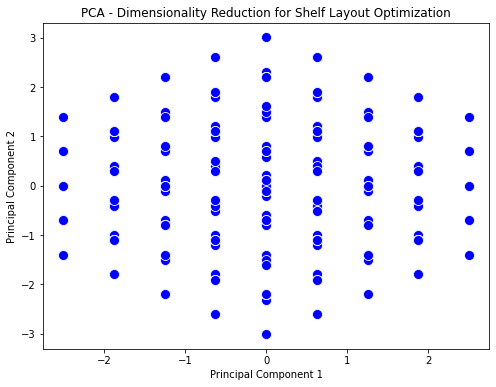

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=data_pca, s=100, color='blue')
plt.title("PCA - Dimensionality Reduction for Shelf Layout Optimization")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [15]:
print("\nExplained Variance Ratio of Each Component:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio of Each Component:
[0.15673655 0.15164721]


In [16]:
print("\nCumulative Explained Variance:")
print(np.cumsum(pca.explained_variance_ratio_))


Cumulative Explained Variance:
[0.15673655 0.30838377]


KeyError: 'Product_ID'